In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Date, cast , desc
from datetime import date , timedelta


In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement =Base.classes.measurement
Station =Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

reference 1: touturing session 
refrence : https://stackoverflow.com/questions/55662957/what-is-the-difference-between-one-and-scalar

In [51]:
#another straight forward way to calculate recent date " refrence 2"
recent_date = session.query(func.max(Measurement.date)).scalar()
year , month, day = map(int, recent_date.split('-'))
recent_date

'2017-08-23'

## Refrences
### https://stackoverflow.com/questions/7075828/make-sqlalchemy-use-date-in-filter-using-postgresql 
### to retrive from sqlalchemy import Date, cast , from datetime import date
### https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
### to convert column date to date format
### change size https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

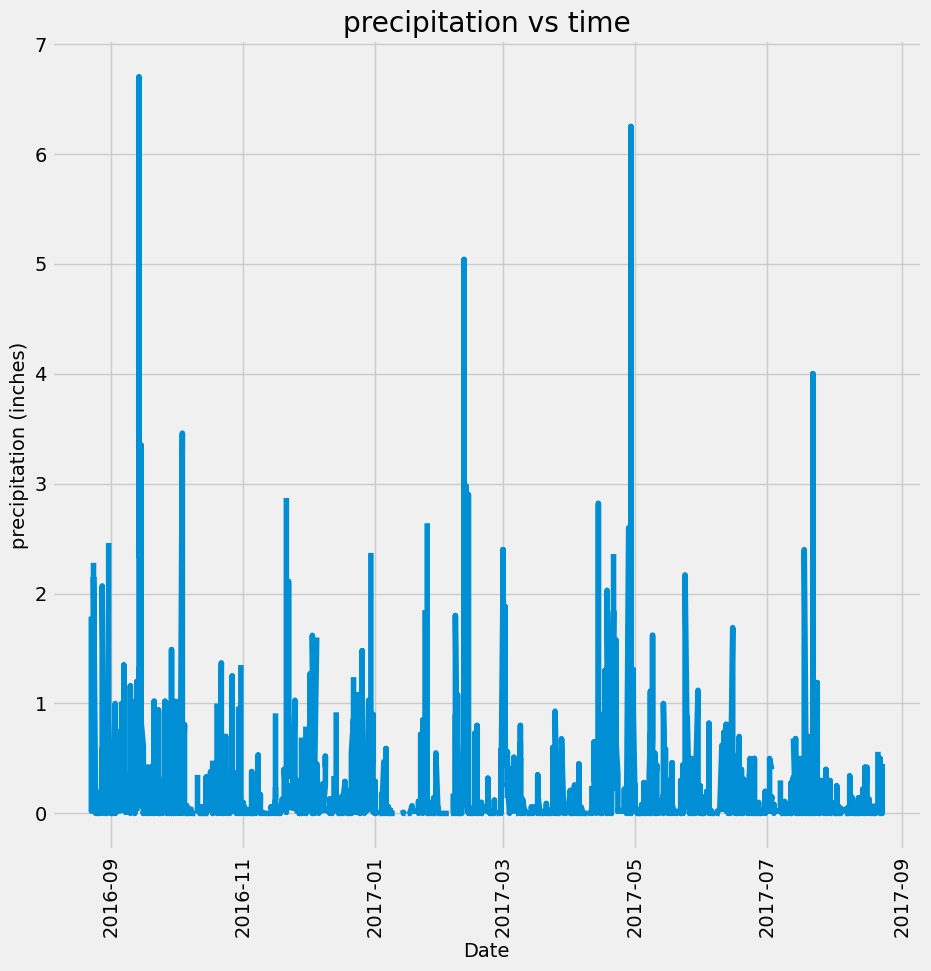

In [143]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set. "date is defined above "
one_year_back = date(year, month, day) - timedelta(days = 365)
one_year_back



# Perform a query to retrieve the data and precipitation scores
data_one_year_back = session.query(Measurement.date , Measurement.prcp).\
filter(Measurement.date >= one_year_back).all()
#all_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_data_one_year_back = pd.DataFrame(data_one_year_back)

#converting the date column to date format
df_data_one_year_back["date"] = pd.to_datetime(df_data_one_year_back["date"])
df_data_one_year_back.columns = ["date", "prcp"]

#Sort the dataframe by date
df_data_one_year_back =(df_data_one_year_back.sort_values(["date"]))
df_data_one_year_back
# # Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,10))
xs = df_data_one_year_back["date"]
ys = df_data_one_year_back["prcp"]
plt.plot(xs,ys)
#lables and fig size

plt.title("precipitation vs time")
plt.xlabel("Date")
plt.ylabel("precipitation (inches)")
plt.xticks(rotation= 90)
plt.show()


In [142]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_data_one_year_back.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()

station_count

9

In [135]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations= session.query(Measurement.station,\
                     func.count(Measurement.station)).\
                     group_by(Measurement.station).\
                     order_by(func.count(Measurement.station).desc())
#converting tuples to a list and extracting the first row with it's key
print(most_active_stations.all())
most_active_station = list(most_active_stations)
most_active_station= most_active_station[0][0]

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [140]:
type(most_active_stations.all()[0])

sqlalchemy.engine.row.Row

In [137]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp_most_active = session.query(Measurement.station, func.min(Measurement.tobs) , func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                        filter(Measurement.station == most_active_station)
                        
min_temp_most_active.all()
# max_temp_most_active = 
# avg_temp_most_active = 

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

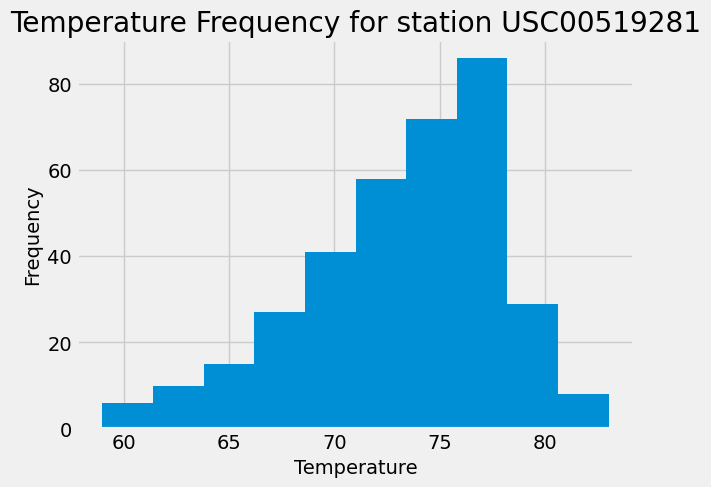

In [170]:
# Extract the id of the most active station
most_active_station = most_active_stations.first()[0]

# Query the last 12 months of temperature observation data for this station
most_active_station_last12 = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station , Measurement.date >= one_year_back).all()

# Convert the query result to a pandas DataFrame
df_most_active_station_last12 = pd.DataFrame(most_active_station_last12, columns=['tobs'])

# Plot the results as a histogram " without setting bins "
plt.hist(df_most_active_station_last12['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Frequency for station {most_active_station}')
plt.show()


Text(0.5, 1.0, 'Temperature Frequency for station USC00519281')

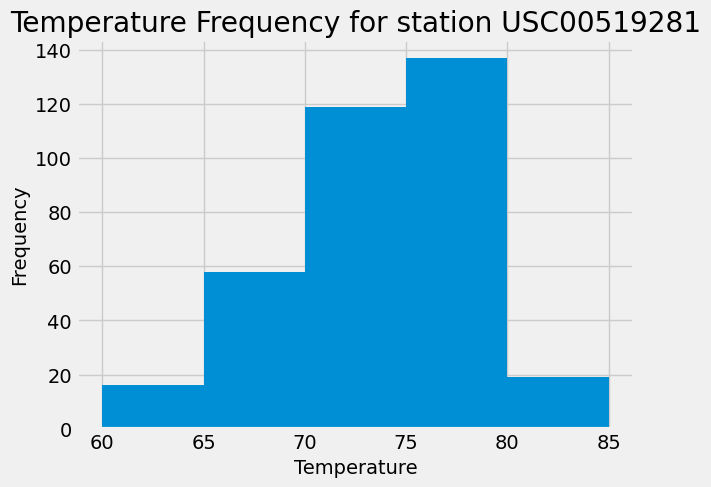

In [169]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_last12 = session.query(Measurement.tobs).filter(Measurement.station == most_active_station , Measurement.date >= one_year_back )
most_active_station_last12.all()
df_most_active_station_last12 = pd.DataFrame(most_active_station_last12)
df_most_active_station_last12

plt.hist(df_most_active_station_last12, bins =bins)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Frequency for station {most_active_station}')

# Close Session

In [38]:
# Close Session
session.close()